# Credit Card Recommendation 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement:" data-toc-modified-id="Problem-Statement:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement:</a></span></li><li><span><a href="#Dataset-Description" data-toc-modified-id="Dataset-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset Description</a></span></li><li><span><a href="#Import-Required-Libraries" data-toc-modified-id="Import-Required-Libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import Required Libraries</a></span></li><li><span><a href="#Importing-the-Dataset" data-toc-modified-id="Importing-the-Dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Importing the Dataset</a></span><ul class="toc-item"><li><span><a href="#Combine-Data" data-toc-modified-id="Combine-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Combine Data</a></span></li></ul></li><li><span><a href="#Understanding-Data" data-toc-modified-id="Understanding-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Understanding Data</a></span><ul class="toc-item"><li><span><a href="#Checking-Dataset-is-Balanced-or-Imbalanced" data-toc-modified-id="Checking-Dataset-is-Balanced-or-Imbalanced-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Checking Dataset is Balanced or Imbalanced</a></span></li><li><span><a href="#Checking-categorical-and-numerical-columns" data-toc-modified-id="Checking-categorical-and-numerical-columns-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Checking categorical and numerical columns</a></span></li><li><span><a href="#Checking-for-null-value" data-toc-modified-id="Checking-for-null-value-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Checking for null value</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Embedding-Power-BI-Report" data-toc-modified-id="Embedding-Power-BI-Report-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Embedding Power BI Report</a></span></li></ul></li><li><span><a href="#Data-Pre-Processing" data-toc-modified-id="Data-Pre-Processing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Data Pre-Processing</a></span><ul class="toc-item"><li><span><a href="#Check-For-Duplicates" data-toc-modified-id="Check-For-Duplicates-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Check For Duplicates</a></span></li><li><span><a href="#Handle-the-missing-value" data-toc-modified-id="Handle-the-missing-value-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Handle the missing value</a></span></li><li><span><a href="#Separate-dataset-as-earlier-on-basis-of-source-column" data-toc-modified-id="Separate-dataset-as-earlier-on-basis-of-source-column-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Separate dataset as earlier on basis of source column</a></span></li><li><span><a href="#Handle-unnecessary-column" data-toc-modified-id="Handle-unnecessary-column-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Handle unnecessary column</a></span></li><li><span><a href="#Handle-Nominal-Categorical-Variables" data-toc-modified-id="Handle-Nominal-Categorical-Variables-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Handle Nominal Categorical Variables</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modelling</a></span></li><li><span><a href="#Predict-Model" data-toc-modified-id="Predict-Model-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Predict Model</a></span></li></ul></div>

##  Problem Statement:
Based on the given dataset predict whether customer will take a credit card or not 

## Dataset Description
Dataset is provided by Analytics Vidhya as part of May-21 Hackathon.

Link to found data and data dictionary: https://datahack.analyticsvidhya.com/contest/job-a-thon-2/?utm_source=datahack&utm_medium=Navbar&utm_campaign=Jobathon#ProblemStatement

This is classification problem with two outputs
* 0 : Customer is not interested
* 1 : Customer is interested

## Import Required Libraries

In [186]:
# importing all the required library

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

from lightgbm import LGBMClassifier
from IPython.display import IFrame

## Importing the Dataset
The dataset is available in .csv file.

In [187]:
# importing csv dataset

train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
print("Dataset imported successfully")

Dataset imported successfully


### Combine Data

In [188]:
# adding one column to identify train and test data

train_data['source'] = 'train'
test_data['source'] = 'test'

# combining data before performing Data Preprocessing , will separate into train and test as earlier before modelling

data = pd.concat([train_data,test_data],ignore_index=True)
print("Test train data merge successfully")

Test train data merge successfully


## Understanding Data

In [189]:
# printing first 5 rows of data to check the type of entries

data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,train


In [190]:
# getting the information about data to check data types of column , count of each columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   351037 non-null  object 
 1   Gender               351037 non-null  object 
 2   Age                  351037 non-null  int64  
 3   Region_Code          351037 non-null  object 
 4   Occupation           351037 non-null  object 
 5   Channel_Code         351037 non-null  object 
 6   Vintage              351037 non-null  int64  
 7   Credit_Product       309190 non-null  object 
 8   Avg_Account_Balance  351037 non-null  int64  
 9   Is_Active            351037 non-null  object 
 10  Is_Lead              245725 non-null  float64
 11  source               351037 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 32.1+ MB


In [191]:
# storing name of columns into a variable

name_of_column = data.columns
name_of_column

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead', 'source'],
      dtype='object')

<strong><em> Observation </em></strong>

There are total 11 columns. Out of which 4 are numerical column , rest are need to covert into categorical columns

ID column is not going to be consider in modelling as per Analytics Vidhya Guidlines. We will drop that column after data pre-processing.

Will delete source column after dividing the dataset

So we need to handle those 6 categorical columns before modelling

### Checking Dataset is Balanced or Imbalanced


In [192]:
# count of Is_Lead distinct value

data["Is_Lead"].value_counts()

0.0    187437
1.0     58288
Name: Is_Lead, dtype: int64

<strong><em> Observation </em></strong>

Class 1 is around 23% of total data. This is imbalanced datset but still we have good amount of data to do modelling

### Checking categorical and numerical columns

In [193]:
# taking number of distinct value in each column

print("No.of.unique values in each column :\n",data.nunique())

No.of.unique values in each column :
 ID                     351037
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    162137
Is_Active                   2
Is_Lead                     2
source                      2
dtype: int64


<strong><em> Observation </em></strong>

> Gender , Occuption , Channel_Code , Credit_Product , Is_Active , Region_Code and Is_Lead are nominal categorical features

> Age , Vintage , Avg_Account_Balance are Continuous features

### Checking for null value

In [194]:
# total count of null value in each column

print("No.of.unique values in each column :\n",data.isnull().sum())

No.of.unique values in each column :
 ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64


<strong><em> Observation </em></strong>

> Credit_Product have 41847 null value.

> Is_Lead have all null value which belong to Test data only

### Conclusion 

* ID column is not going to be used in prediction

* source column is also dropped further

* We need to handle only one null values column i.e. Credit_Product

* We have 6 categorical columns ,which we need to convert into numerical columns

* 5 Out of 6 are nominal features

## Exploratory Data Analysis

<Figure size 432x1152 with 0 Axes>

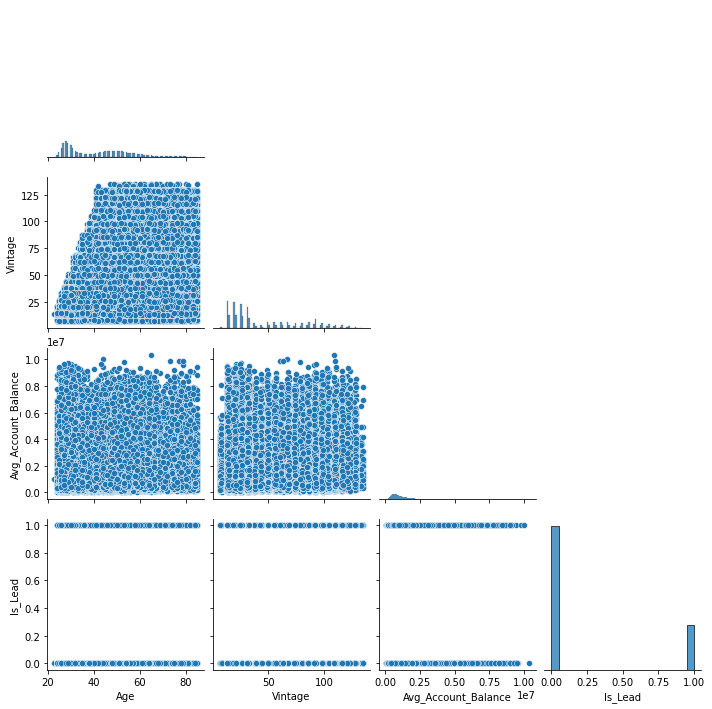

In [195]:
plt.figure(figsize=(6,16))
sns.pairplot(data=data,corner=True)

c:\users\fostersfc\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


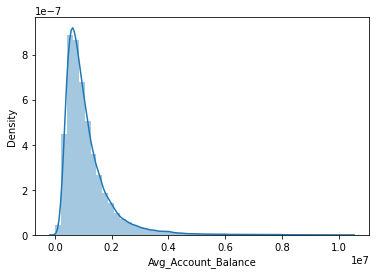

In [196]:
sns.distplot(data['Avg_Account_Balance'])
plt.show()

c:\users\fostersfc\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


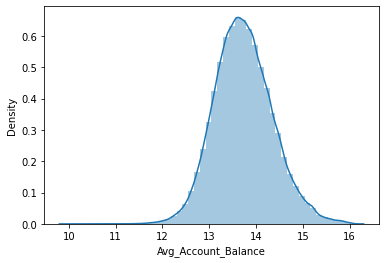

In [197]:
data['Avg_Account_Balance'] = np.log(data['Avg_Account_Balance'])
sns.distplot(data['Avg_Account_Balance'])
plt.show()

<strong><em> Observation </em></strong>

> Average Account Balance have Power law distribution

c:\users\fostersfc\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


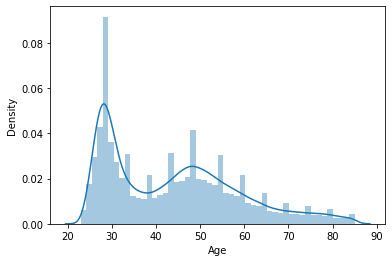

In [198]:
sns.distplot(data['Age'])
plt.show()

### Embedding Power BI Report

In [199]:
powerBiEmbed = 'https://app.powerbi.com/reportEmbed?reportId=30056a56-ae7a-4767-9b27-7dce3924fc84&autoAuth=true&ctid=e0793d39-0939-496d-b129-198edd916feb&config=eyJjbHVzdGVyVXJsIjoiaHR0cHM6Ly93YWJpLXVzLW5vcnRoLWNlbnRyYWwtcmVkaXJlY3QuYW5hbHlzaXMud2luZG93cy5uZXQvIn0%3D'

IFrame(powerBiEmbed, width=1200, height=400)

In [3]:
# In case if above report doesn't show up or ask for login , please open file in this same directory named as "report.html"

## Data Pre-Processing

### Check For Duplicates

In [200]:
# store duplicate boolean value into a variable

duplicate_row = data.duplicated()     

# check if there is any True value , True means that row is duplicated else print no row is duplicated
for row_index in range (0,len(data)):
    if duplicate_row[row_index] == True :
        print("Row",row_index,"is duplicate.")
else:
    print("No row is duplicate")

No row is duplicate


### Handle the missing value

In [201]:
# As we check above Credit_Product is only column who have null values

data["Credit_Product"].value_counts()

No     205965
Yes    103225
Name: Credit_Product, dtype: int64

<strong><em> Observation </em></strong>
* As we already know Credit_product has 41847 null value

<strong><em> Solution </em></strong>
* Considering Hypothesis Testing 

> Null Hypothesis : Replacing null values with least value will improve model accuracy 

> Alternative Hypothesis : Replacing null values with least value will not improve model accuracy 

In [202]:
# Null values are present before handling missing values

print("Before handling missing value present at some rows are",data["Credit_Product"][6])

# Replacing null value with Yes

data["Credit_Product"].fillna("Yes" , inplace= True )

# Null values are not present after handling missing values

print("Before handling missing value present at some rows are",data["Credit_Product"][6])

Before handling missing value present at some rows are nan
Before handling missing value present at some rows are Yes


In [203]:
display(data.head())
display(data.shape)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,13.860193,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,13.274205,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,14.210464,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,13.061453,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,13.695360,No,0.0,train


(351037, 12)

### Separate dataset as earlier on basis of source column

In [204]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [205]:
train.shape , test.shape

((245725, 12), (105312, 12))

In [206]:
display(train)
display(test)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,13.860193,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,13.274205,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,14.210464,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,13.061453,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,13.695360,No,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,Yes,14.470741,No,0.0,train
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,13.668114,Yes,0.0,train
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,13.416016,No,0.0,train
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,12.917806,No,0.0,train


,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
245725,VBENBARO,Male,29,RG254,Other,X1,25,Yes,13.517598,No,NaN,test
245726,CCMEWNKY,Male,43,RG268,Other,X2,49,Yes,13.738129,No,NaN,test
245727,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,12.282798,No,NaN,test
245728,TT8RPZVC,Male,29,RG272,Other,X1,33,No,13.674028,No,NaN,test
245729,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,13.395572,No,NaN,test
...,...,...,...,...,...,...,...,...,...,...,...,...
351032,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,15.260677,Yes,NaN,test
351033,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,13.963200,No,NaN,test
351034,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,14.348329,No,NaN,test
351035,2PW4SFCA,Male,53,RG254,Other,X3,93,No,13.510585,Yes,NaN,test


### Handle unnecessary column

In [207]:
#Dropping unnecessary columns such as ID and source 
test.drop(['Is_Lead','source',"ID"],axis=1,inplace=True)
train.drop(['ID','source'],axis=1,inplace=True)

c:\users\fostersfc\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [208]:
display(train)
display(test)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,13.860193,No,0.0
1,Female,30,RG277,Salaried,X1,32,No,13.274205,No,0.0
2,Female,56,RG268,Self_Employed,X3,26,No,14.210464,Yes,0.0
3,Male,34,RG270,Salaried,X1,19,No,13.061453,No,0.0
4,Female,30,RG282,Salaried,X1,33,No,13.695360,No,0.0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,Yes,14.470741,No,0.0
245721,Male,27,RG268,Salaried,X1,15,No,13.668114,Yes,0.0
245722,Female,26,RG281,Salaried,X1,13,No,13.416016,No,0.0
245723,Female,28,RG273,Salaried,X1,31,No,12.917806,No,0.0


,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
245725,Male,29,RG254,Other,X1,25,Yes,13.517598,No
245726,Male,43,RG268,Other,X2,49,Yes,13.738129,No
245727,Male,31,RG270,Salaried,X1,14,No,12.282798,No
245728,Male,29,RG272,Other,X1,33,No,13.674028,No
245729,Female,29,RG270,Other,X1,19,No,13.395572,No
...,...,...,...,...,...,...,...,...,...
351032,Male,52,RG268,Salaried,X2,86,Yes,15.260677,Yes
351033,Male,55,RG277,Other,X2,86,Yes,13.963200,No
351034,Male,35,RG254,Salaried,X4,15,No,14.348329,No
351035,Male,53,RG254,Other,X3,93,No,13.510585,Yes


### Handle Nominal Categorical Variables

In [209]:
list_of_nominal_feature = []       # empty list of nominal features

# appending all column whose data type is not numerical
for col in train.columns:
    if train[col].dtypes != "int64" and train[col].dtypes != "float64" and col!= "source":
        list_of_nominal_feature.append(col)
list_of_nominal_feature

['Gender',
 'Region_Code',
 'Occupation',
 'Channel_Code',
 'Credit_Product',
 'Is_Active']

In [210]:
# converting categorical column into numerical column 

label_encoder = LabelEncoder()
for col in list_of_nominal_feature:
    train[col] = label_encoder.fit_transform(train[col])
    test[col] = label_encoder.fit_transform(test[col])
print("Columns in list_of_nominal_feature are converted to numerical variables")    

<ipython-input-210-9a1881ebc9c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = label_encoder.fit_transform(train[col])
<ipython-input-210-9a1881ebc9c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = label_encoder.fit_transform(test[col])


Columns in list_of_nominal_feature are converted to numerical variables


In [211]:
display(train.head())
display('Test data shape',train.shape)
display(test.head())
display('Test data shape',test.shape)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,13.860193,0,0.0
1,0,30,27,2,0,32,0,13.274205,0,0.0
2,0,56,18,3,2,26,0,14.210464,1,0.0
3,1,34,20,2,0,19,0,13.061453,0,0.0
4,0,30,32,2,0,33,0,13.695360,0,0.0


'Test data shape'

(245725, 10)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
245725,1,29,4,1,0,25,1,13.517598,0
245726,1,43,18,1,1,49,1,13.738129,0
245727,1,31,20,2,0,14,0,12.282798,0
245728,1,29,22,1,0,33,0,13.674028,0
245729,0,29,20,1,0,19,0,13.395572,0


'Test data shape'

(105312, 9)

In [212]:
# independent variable is stored into another dataframe 

data_train_X = train.drop('Is_Lead',axis=1)
data_train_y = train['Is_Lead'].astype("int64")

In [213]:
display(data_train_X)
display(data_train_y)

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,0,73,18,1,2,43,0,13.860193,0
1,0,30,27,2,0,32,0,13.274205,0
2,0,56,18,3,2,26,0,14.210464,1
3,1,34,20,2,0,19,0,13.061453,0
4,0,30,32,2,0,33,0,13.695360,0
...,...,...,...,...,...,...,...,...,...
245720,1,51,34,3,2,109,1,14.470741,0
245721,1,27,18,2,0,15,0,13.668114,1
245722,0,26,31,2,0,13,0,13.416016,0
245723,0,28,23,2,0,31,0,12.917806,0


0         0
1         0
2         0
3         0
4         0
         ..
245720    0
245721    0
245722    0
245723    0
245724    0
Name: Is_Lead, Length: 245725, dtype: int64

### Conclusion 

> There is no duplicate in whole data set

> Replace null value in Credit_Product with Yes

> Dataset transform it into original shape with same data

> ID and source column are dropped as they are not going to add any value to model

> Nominal Categorical variable converted into numerical dataset

## Feature Selection 

In [214]:
# Thresold = 0.01 means 99% data in that column is same

print("Shape of train data before filtering",data_train_X.shape)
var_filter = VarianceThreshold(threshold = 0.01)  
train = var_filter.fit_transform(data_train_X)
#to get the count of features that are not constant
data_train_X = data_train_X[data_train_X.columns[var_filter.get_support(indices=True)]]
print("Shape of train data before filtering",data_train_X.shape)

Shape of train data before filtering (245725, 9)
Shape of train data before filtering (245725, 9)


In [215]:
correlated_features = set()
correlation_matrix = data_train_X.corr()
correlation_matrix

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
Gender,1.000000,0.152076,0.004813,0.031536,0.150586,0.146380,0.077313,0.031780,0.064207
Age,0.152076,1.000000,0.117914,-0.127753,0.605543,0.631242,0.246636,0.176838,0.218770
Region_Code,0.004813,0.117914,1.000000,0.012186,0.103018,0.118810,0.078164,0.097152,0.059576
Occupation,0.031536,-0.127753,0.012186,1.000000,0.123937,0.027156,0.017734,-0.037480,0.077208
Channel_Code,0.150586,0.605543,0.103018,0.123937,1.000000,0.537852,0.304308,0.127236,0.249655
Vintage,0.146380,0.631242,0.118810,0.027156,0.537852,1.000000,0.235752,0.201592,0.209356
Credit_Product,0.077313,0.246636,0.078164,0.017734,0.304308,0.235752,1.000000,0.097256,-0.059762
Avg_Account_Balance,0.031780,0.176838,0.097152,-0.037480,0.127236,0.201592,0.097256,1.000000,0.088535
Is_Active,0.064207,0.218770,0.059576,0.077208,0.249655,0.209356,-0.059762,0.088535,1.000000


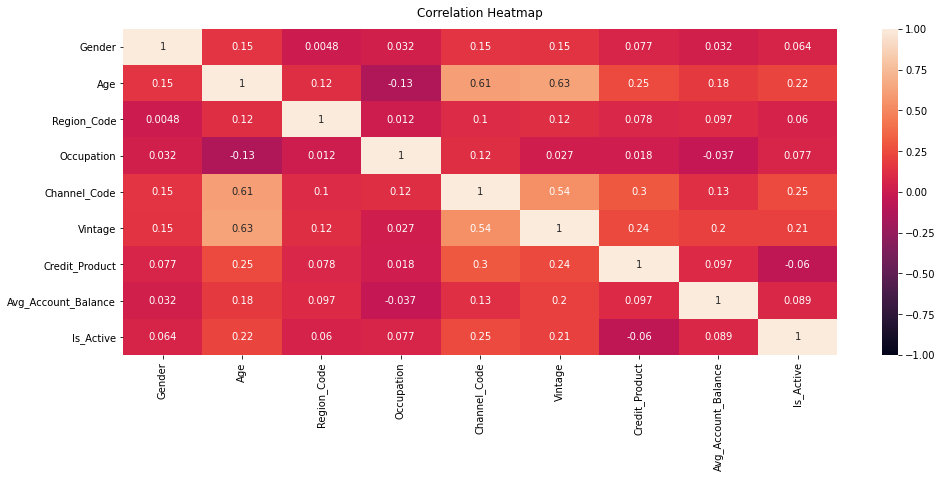

In [216]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data_train_X.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Conclusion 

> We have already less number of features so dropping any feature won't be good idea

> By thersold at 0.1 , no column filter out 

> By correlation matrix , we got the highest covariance as 0.63 but this is not enough to drop any column

> This implies that all feature are important for modelling

## Modelling

In [217]:
# funtion to run different model

def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    return alg

In [218]:
lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

In [219]:
lgb_model = cross_val(data_train_X, data_train_y, LGBMClassifier, lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.378501
[800]	valid_0's binary_logloss: 0.37827
Early stopping, best iteration is:
[802]	valid_0's binary_logloss: 0.378264
roc_auc_score: 0.8539183817995556
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.382606
Early stopping, best iteration is:
[524]	valid_0's binary_logloss: 0.382519
roc_auc_score: 0.8500343931608946
--------------------------------------------------
Fold: 2
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.384762
Early stopping, best iteration is:
[607]	valid_0's binary_logloss: 0.38465
roc_auc_score: 0.847290061663613
--------------------------------------------------
Fold: 3
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.383285
Early stopping, best iteration is:


In [220]:
pred_test_lgb = lgb_model.predict_proba(test)[:,1]
pred_test_lgb

array([0.06504483, 0.36827954, 0.06163232, ..., 0.07453434, 0.22662624,
       0.05345713])

## Predict Model

In [221]:
pred_test_lgb = lgb_model.predict_proba(test)[:,1]

In [222]:
sample_submission = pd.read_csv('sample_submission.csv')

In [223]:
sample_submission['Is_Lead'] = pred_test_lgb
sample_submission.to_csv('pred_test_lgb.csv',index=False)
print("Submission file is ready")

Submission file is ready
